In [249]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', 100)

## Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



**Has the network latency gone up since we switched internet service providers?**

**Reword:** Is *network latency* greater with our current internet service provider than our previous.

- $H_0$: $\mu_{current-isr} = \mu_{prev-isr}$
- $H_a$: $\mu_{current-isr} > \mu_{prev-isr}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

**Is the website redesign any good?**

- $H_0$: $\mu_{new} = \mu_{old}$
- $H_a$: $\mu_{new} > \mu_{old}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

**Is our television ad driving more sales?**

**Reword:** Are *sales* greater with (after) our ad out?

- $H_0$: $\mu_{ad} = \mu_{no-ad}$
- $H_a$: $\mu_{ad} > \mu_{no-ad}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

## Comparison of Means

**1.** Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - One Sample T-Test (2-sided)
- Are adults who drink milk taller than adults who dont drink milk?
    - Independent (Two-Sample) T-Test (1-sided)
- Is the the price of gas higher in texas or in new mexico?
    - Independent (Two-Sample) T-Test (1-sided)
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - ANOVA

**2.** Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
n_1 = 40
mu_1 = 90
std_1 = 15

n_2 = 50
mu_2 = 100
std_2 = 20

0. Plot Distributions

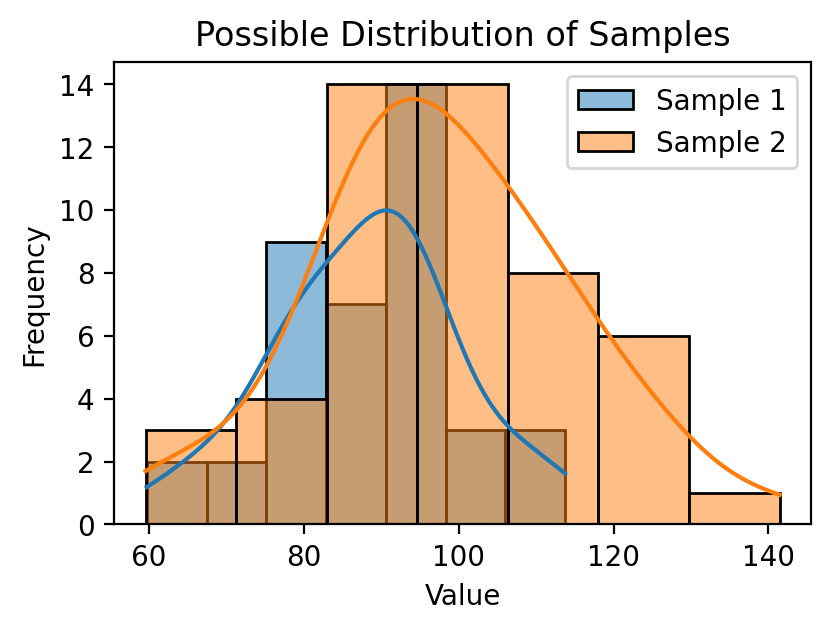

In [3]:
sample1 = np.random.normal(mu_1, std_1, n_1)
sample2 = np.random.normal(mu_2, std_2, n_2)

plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(sample1, kde=True, alpha=0.5, label='Sample 1')

# Plot histogram for Sample 2
sns.histplot(sample2, kde=True, alpha=0.5, label='Sample 2')

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Possible Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ ≠ μ₂


In [4]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Equal Variance: Variances are not equal
- Normality: We can assume normality. The samples are large enough $n>30$

3. Compute t-stat and p-value

In [5]:
# Performing independent t-test
t_stat, p_value = stats.ttest_ind_from_stats(mu_1, std_1, n_1,
                                             mu_2, std_2, n_2, 
                                             equal_var=False,
                                             alternative='two-sided')

print(t_stat, p_value)

-2.7091418459143854 0.00811206270346016


4. Infer

In [6]:
if p_value < alpha:
    print("Reject the null hypothesis. The average time to sell homes is different for the two offices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average time to sell homes.")


Reject the null hypothesis. The average time to sell homes is different for the two offices.


**3.** Load the mpg dataset and use it to answer the following questions:

In [7]:
from pydataset import data

In [8]:
mpg_df = data('mpg')
mpg_df.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


**Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**


In [31]:
mpg_df['avg_mpg'] = stats.hmean(mpg_df[['cty','hwy']], axis = 1)

In [32]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [33]:
mpg_08 = mpg_df[mpg_df['year'] == 2008]
p_hat_08 = mpg_08['avg_mpg'].mean()

mpg_99 = mpg_df[mpg_df['year'] == 1999]
p_hat_99 = mpg_99['avg_mpg'].mean()

p_hat_08, p_hat_99

(19.48866298656906, 19.682387648697297)

0. Plot Distributions

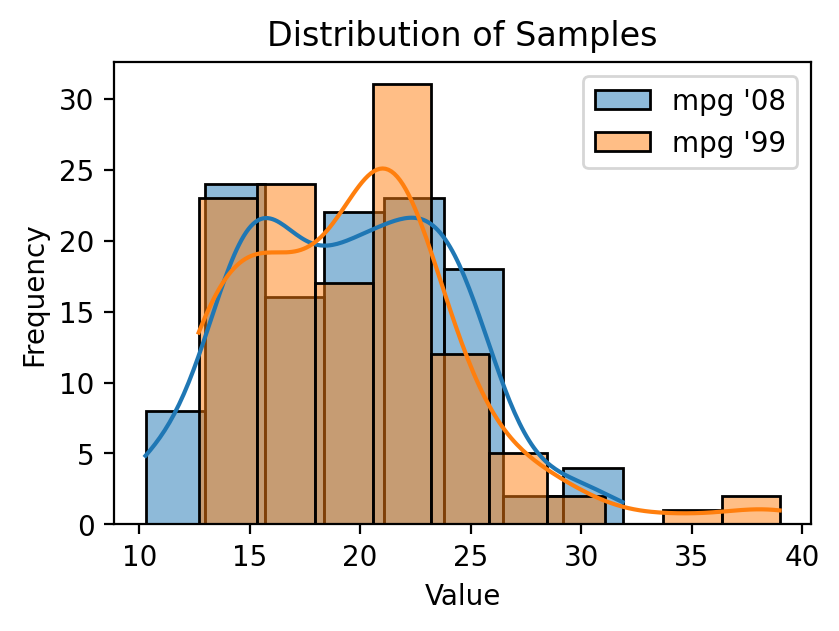

In [34]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_08['avg_mpg'], kde=True, alpha=0.5, label="mpg '08")

# Plot histogram for Sample 2
sns.histplot(mpg_99['avg_mpg'], kde=True, alpha=0.5, label="mpg '99")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ ≠ μ₂


In [35]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Normality: We can assume normality. The samples are large $n>30$

In [36]:
# sample sizes
mpg_df['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

- Equal Variance: Variances are not equal

In [37]:
print(f"sample1 variance: {mpg_08['avg_mpg'].var()}")
print(f"sample2 variance: {mpg_99['avg_mpg'].var()}")

# Levene test
stat, p_levene = stats.levene(mpg_08['avg_mpg'], mpg_99['avg_mpg'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

sample1 variance: 22.550836772260343
sample2 variance: 25.850396545865912
Levene Test: stat=0.031071867429515194, p_value=0.8602339200830025
we will assume equal variances


3. Compute t-stat and p-value

In [38]:
t, p = stats.ttest_ind(mpg_08['avg_mpg'], mpg_99['avg_mpg'], equal_var=True)
t, p

(-0.3011962975077886, 0.7635345888327115)

4. Infer

In [39]:
if p < alpha:
    print("Reject the null hypothesis. The average mpg is different for the model years.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not different for the model years.")


Fail to reject the null hypothesis. The average mpg is not different for the model years.


**Are compact cars more fuel-efficient than the average car?**


In [40]:
mpg_com = mpg_df[mpg_df['class'] == 'compact']
p_hat_com = mpg_com['avg_mpg'].mean()

p_hat = mpg_df['avg_mpg'].mean()

p_hat_com, p_hat

(23.5004168087013, 19.585525317633174)

0. Plot Distributions

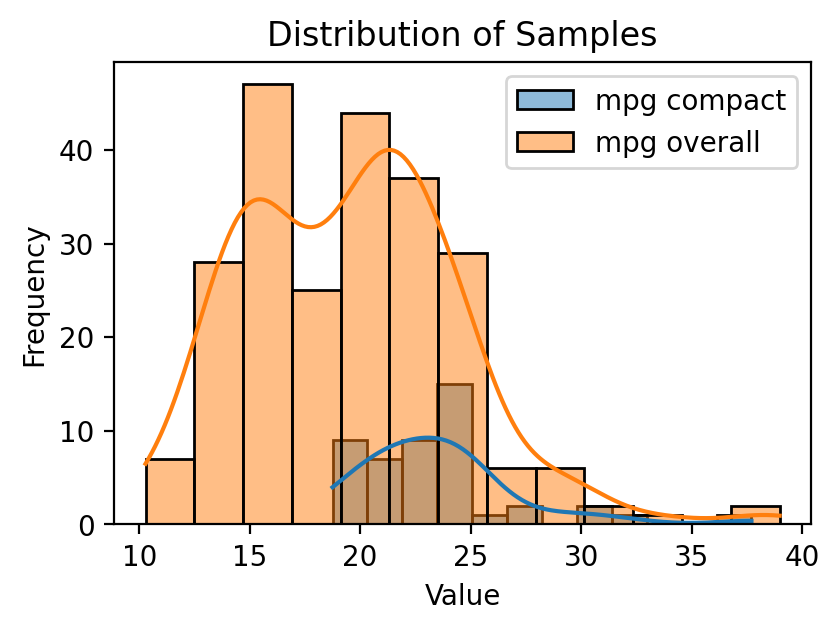

In [41]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_com['avg_mpg'], kde=True, alpha=0.5, label="mpg compact")

# Plot histogram for Sample 2
sns.histplot(mpg_df['avg_mpg'], kde=True, alpha=0.5, label="mpg overall")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ

Hₐ: μ₁ < μ


In [42]:
alpha =.05

2. Verify Assumptions

- Normality: We can assume normality. The sample is large enough $n>30$

In [43]:
# sample sizes
mpg_df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

3. Compute t-stat and p-value

In [44]:
t, p = stats.ttest_1samp(mpg_com['avg_mpg'], p_hat)
t, p/2

(7.512360093161361, 7.808833174403665e-10)

4. Infer

In [45]:
if p/2 < alpha or t > 0:
    print("Reject the null hypothesis. The average mpg is more for compact cars.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not more for compact cars.")


Reject the null hypothesis. The average mpg is more for compact cars.


**Do manual cars get better gas mileage than automatic cars?**

In [46]:
mpg_manual = mpg_df[mpg_df['trans'].str.startswith('manual')]
p_hat_manual = mpg_manual['avg_mpg'].mean()

mpg_auto = mpg_df[mpg_df['trans'].str.startswith('auto')]
p_hat_auto = mpg_auto['avg_mpg'].mean()

p_hat_auto, p_hat_manual

(18.583199507835744, 21.629228592155208)

0. Plot Distributions

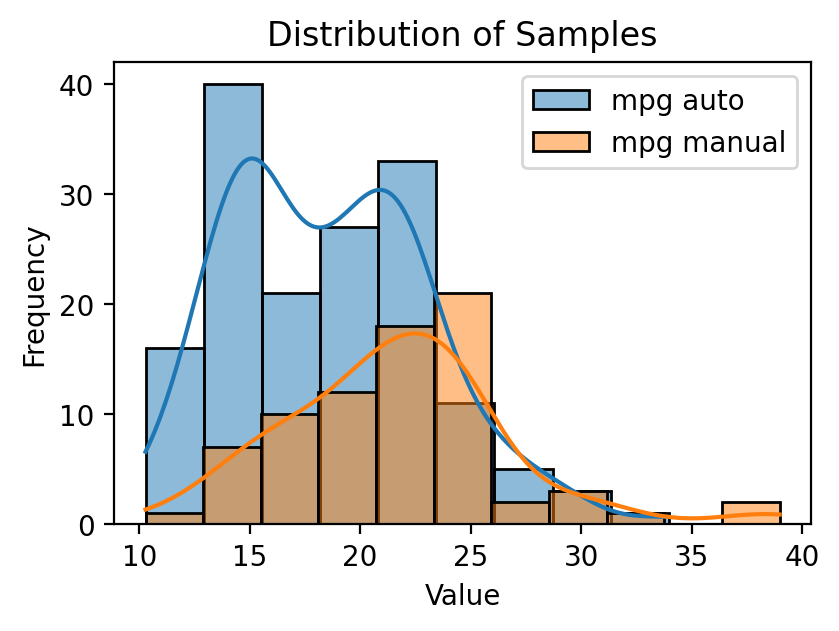

In [47]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_auto['avg_mpg'], kde=True, alpha=0.5, label="mpg auto")

# Plot histogram for Sample 2
sns.histplot(mpg_manual['avg_mpg'], kde=True, alpha=0.5, label="mpg manual")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ > μ₂


In [48]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Normality: We can assume normality. The samples are large $n>30$

In [49]:
# sample sizes
mpg_df['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

- Equal Variance: Variances are not equal

In [50]:
print(f"sample1 variance: {mpg_manual['avg_mpg'].var()}")
print(f"sample2 variance: {mpg_auto['avg_mpg'].var()}")

# Levene test
stat, p_levene = stats.levene(mpg_manual['avg_mpg'], mpg_auto['avg_mpg'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

sample1 variance: 25.665633639828275
sample2 variance: 20.428279095002054
Levene Test: stat=0.013901207169738269, p_value=0.9062462281015493
we will assume equal variances


3. Compute t-stat and p-value

In [51]:
t, p = stats.ttest_ind(mpg_manual['avg_mpg'], mpg_auto['avg_mpg'], equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

4. Infer

In [52]:
if p/2 < alpha and t > 0:
    print("Reject the null hypothesis. The average mpg is more for manual cars.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not more for the manual cars.")


Reject the null hypothesis. The average mpg is more for manual cars.


## Correlation

**1.** Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
    - correlation test
- Do guys and gals quit their jobs at the same rate?
    - $\chi^2$ test
- Does the length of time of the lecture correlate with a students grade?
    - correlation test

**2.** Use the telco_churn data.

In [229]:
telco_churn = pd.read_csv('../telco_norm.csv')
display(telco_churn[['signup_date','monthly_charges','total_charges']].dtypes)
telco_churn.head(3)

signup_date         object
monthly_charges    float64
total_charges       object
dtype: object

,customer_id,signup_date,churn_month,monthly_charges,total_charges,payment_type_id,payment_type,contract_type_id,contract_type,gender,senior_citizen,partner,dependents,paperless_billing,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0002-ORFBO,2021-04-21 18:07:34,NaN,65.6,593.3,2,Mailed check,2,One year,Female,0,Yes,Yes,Yes,Yes,No,1,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,2021-04-21 18:07:34,NaN,59.9,542.4,2,Mailed check,1,Month-to-month,Male,0,No,No,No,Yes,Yes,1,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,2021-09-21 18:07:34,2022-01-31,73.9,280.85,1,Electronic check,1,Month-to-month,Male,0,No,No,Yes,Yes,No,2,Fiber optic,No,No,Yes,No,No,No


A. Does tenure correlate with monthly charges?

First creating tenure column

In [230]:
telco_churn['total_charges'].value_counts().head()

20.2     11
         11
19.75     9
19.9      8
19.65     8
Name: total_charges, dtype: int64

In [231]:
# drop blank total_charges
telco_churn = telco_churn[~telco_churn['total_charges'].str.isspace()]

In [237]:
# convert data types
telco_churn['signup_date'] = pd.to_datetime(telco_churn['signup_date'])
telco_churn['total_charges'] = telco_churn['total_charges'].astype(float)
display(telco_churn[['signup_date','total_charges']].dtypes)

signup_date      datetime64[ns]
total_charges           float64
dtype: object

In [238]:
# Calculate tenure as the difference between current day and signup date
current_day = datetime.datetime.now().date()
telco_churn['tenure'] = (current_day - telco_churn['signup_date'].dt.date).dt.days

In [239]:
df = telco_churn[['tenure','monthly_charges','total_charges']]
df.head()

,tenure,monthly_charges,total_charges
0,771,65.6,593.30
1,771,59.9,542.40
2,618,73.9,280.85
3,892,98.0,1237.85
4,588,83.9,267.40


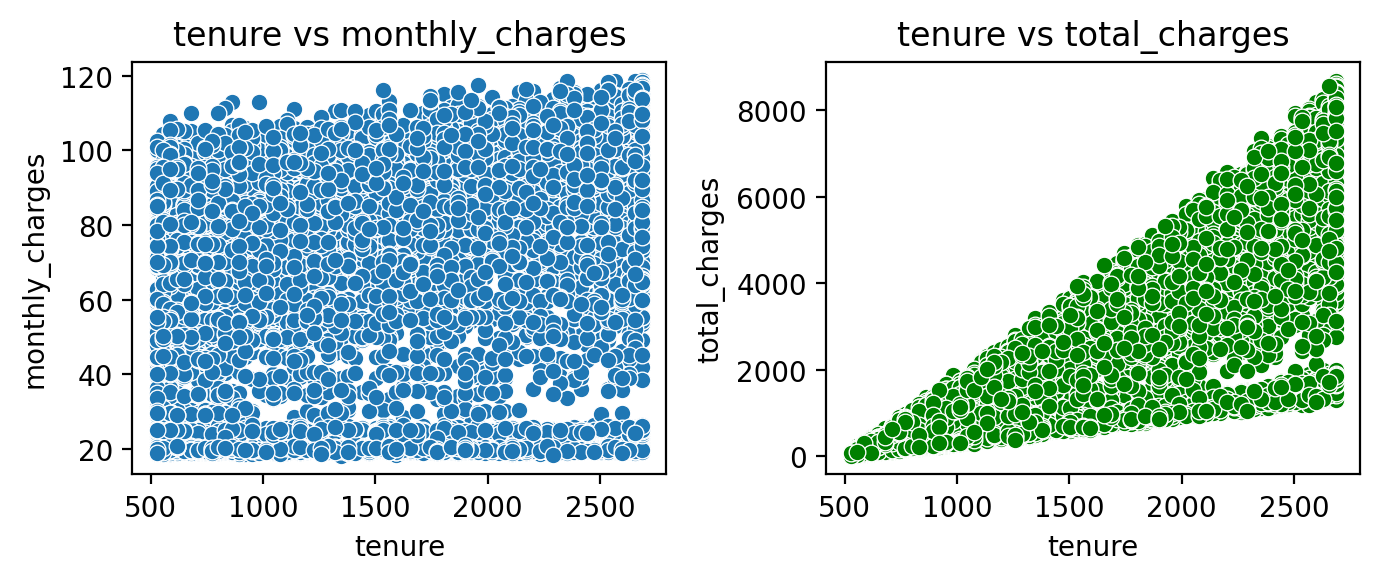

In [240]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Plot the first scatter plot
sns.scatterplot(data=df, x='tenure', y='monthly_charges', ax=axes[0])
axes[0].set_title('tenure vs monthly_charges')

# Plot the second scatter plot
sns.scatterplot(data=df, x='tenure', y='total_charges', color='green', ax=axes[1])
axes[1].set_title('tenure vs total_charges')

# Adjust spacing between subplots
plt.tight_layout()

Set Hypotheses and alpha for correlation test:

- $H_0$: tenure and monthly charges have no linear relationship
- $H_a$: tenure and monthly charges have a linear relationship
- $\alpha = .05$


Verify Assumptions

Normality: pairplot wouldn't show normally distributed features but we can bypass this with large sample sizes

Test

In [115]:
r, p = stats.pearsonr(df['tenure'], df['monthly_charges'])
r, p

(0.24687416389291195, 3.899252789442747e-98)

Infer: There's signicant evidence that there is almost no linear correlation between tenure and monthly charges.

- Total charges?

Set Hypotheses and alpha for correlation test:

- $H_0$: tenure and total charges have no linear relationship
- $H_a$: tenure and total charges have a linear relationship
- $\alpha = .05$

In [116]:
r, p = stats.pearsonr(df['tenure'], df['total_charges'])
r, p

(0.8258734547376585, 0.0)

Infer: There's signicant evidence that there is a highly positive correlation between tenure and monthly charges.

B. What happens if you control for phone and internet service?

In [228]:
df2 = telco_churn[['tenure','monthly_charges','total_charges','internet_service_type', 'phone_service']]
display(df2['internet_service_type'].unique())
df2.head()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,771,65.6,593.30,DSL,Yes
1,771,59.9,542.40,DSL,Yes
2,618,73.9,280.85,Fiber optic,Yes
3,892,98.0,1237.85,Fiber optic,Yes
4,588,83.9,267.40,Fiber optic,Yes


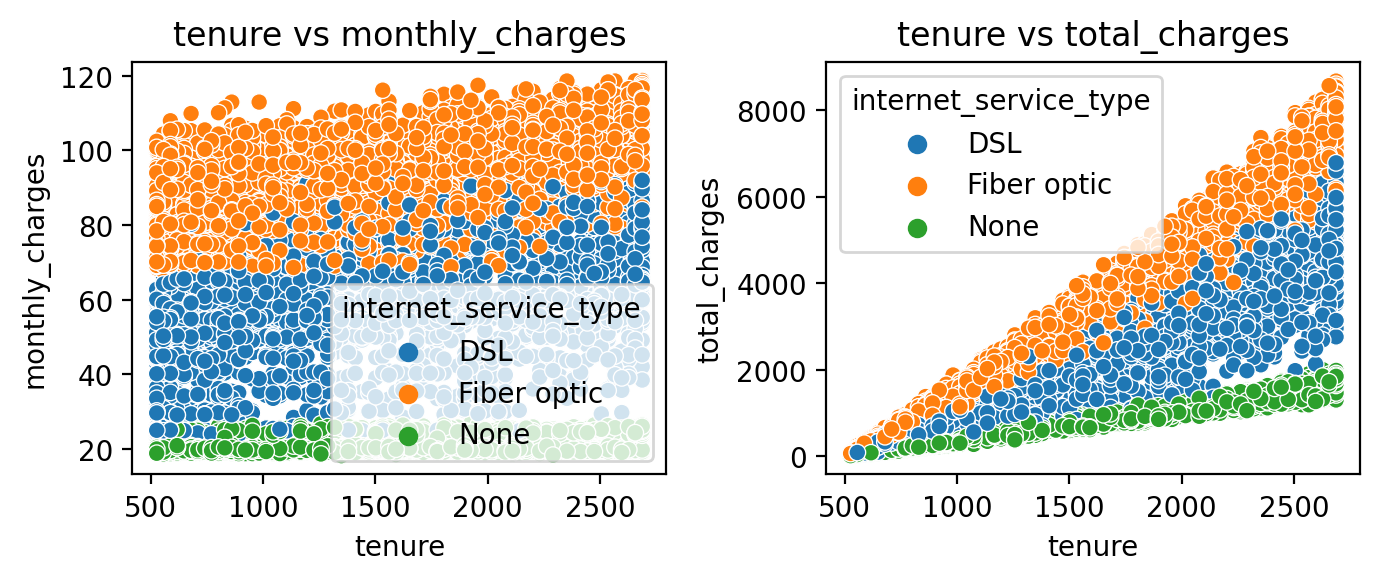

In [152]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Plot the first scatter plot
sns.scatterplot(data=df2, x='tenure', y='monthly_charges', hue='internet_service_type', ax=axes[0])
axes[0].set_title('tenure vs monthly_charges')

# Plot the second scatter plot
sns.scatterplot(data=df2, x='tenure', y='total_charges', hue='internet_service_type',
                color='green', ax=axes[1])
axes[1].set_title('tenure vs total_charges')

# Adjust spacing between subplots
plt.tight_layout()

Set Hypotheses and alpha for correlation test:

- $H_0$: tenure and monthly charges have no linear relationship when we control internet service type
- $H_a$: tenure and monthly charges have a linear relationship when we control internet service type
- $\alpha = .05$

In [161]:
print('Tenure vs Monthly Charges for:')
for i_s_type in df2['internet_service_type'].unique():
    df = df2[df2['internet_service_type']==i_s_type]
    r, p = stats.pearsonr(df['tenure'], df['monthly_charges'])
    print(f'{i_s_type}: r={r} p={p}')

Tenure vs Monthly Charges for:
DSL: r=0.5196827607542431 p=2.9826678236101816e-167
Fiber optic: r=0.6246283864520598 p=0.0
None: r=0.3461737979757798 p=4.937718101310057e-44


In [162]:
print('Tenure vs Total Charges for:')
for i_s_type in df2['internet_service_type'].unique():
    df = df2[df2['internet_service_type']==i_s_type]
    r, p = stats.pearsonr(df['tenure'], df['total_charges'])
    print(f'{i_s_type}: r={r} p={p}')

Tenure vs Total Charges for:
DSL: r=0.9411593088441619 p=0.0
Fiber optic: r=0.9852969535649617 p=0.0
None: r=0.9814583657216259 p=0.0


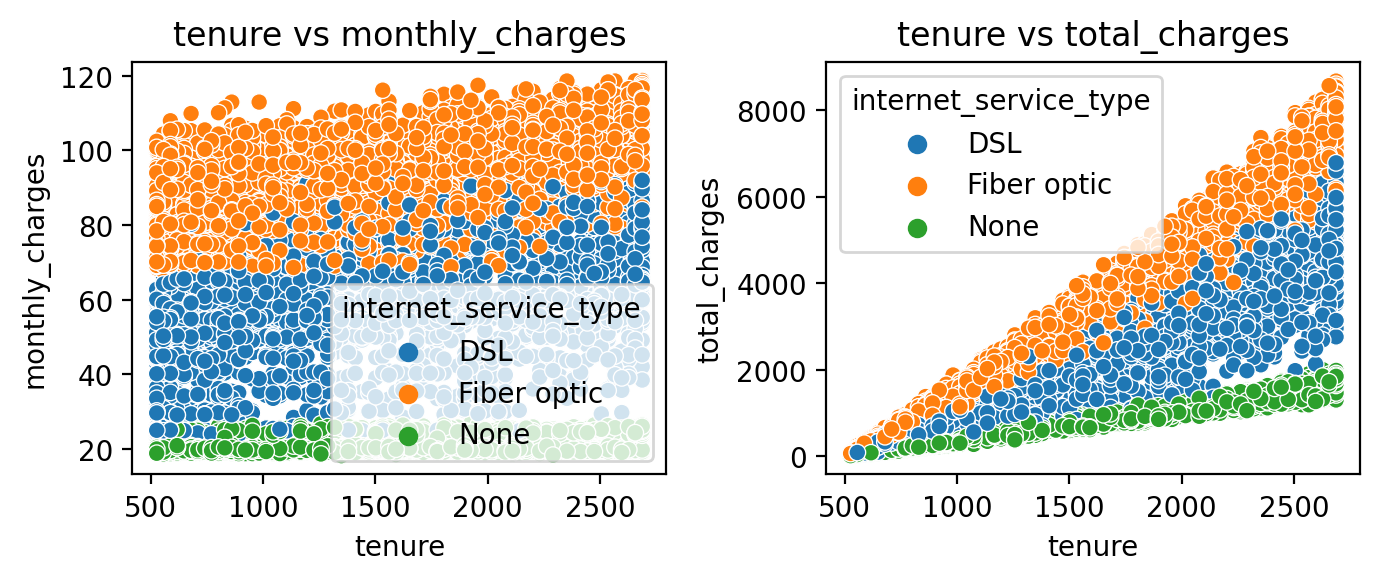

In [152]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Plot the first scatter plot
sns.scatterplot(data=df2, x='tenure', y='monthly_charges', hue='phone_service', ax=axes[0])
axes[0].set_title('tenure vs monthly_charges')

# Plot the second scatter plot
sns.scatterplot(data=df2, x='tenure', y='total_charges', hue='phone_service',
                color='green', ax=axes[1])
axes[1].set_title('tenure vs total_charges')

# Adjust spacing between subplots
plt.tight_layout()

Set Hypotheses and alpha for correlation test:

- $H_0$: tenure and monthly charges have no linear relationship when we control phone service
- $H_a$: tenure and monthly charges have a linear relationship when we control phone service
- $\alpha = .05$

In [161]:
print('Tenure vs Monthly Charges for:')
for i_s_type in df2['phone_service'].unique():
    df = df2[df2['phone_service']==i_s_type]
    r, p = stats.pearsonr(df['tenure'], df['monthly_charges'])
    print(f'{i_s_type}: r={r} p={p}')

Tenure vs Monthly Charges for:
DSL: r=0.5196827607542431 p=2.9826678236101816e-167
Fiber optic: r=0.6246283864520598 p=0.0
None: r=0.3461737979757798 p=4.937718101310057e-44


In [162]:
print('Tenure vs Total Charges for:')
for i_s_type in df2['phone_service'].unique():
    df = df2[df2['phone_service']==i_s_type]
    r, p = stats.pearsonr(df['tenure'], df['total_charges'])
    print(f'{i_s_type}: r={r} p={p}')

Tenure vs Total Charges for:
DSL: r=0.9411593088441619 p=0.0
Fiber optic: r=0.9852969535649617 p=0.0
None: r=0.9814583657216259 p=0.0


**3.** Use the employees database.

In [165]:
import env
import datetime

In [190]:
sql = '''SELECT * FROM salaries'''
con = f'''mysql+pymysql://{env.user}:{env.pwd}@{env.host}/employees'''
emp_df = pd.read_sql(sql, con)
emp_df.head(3)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25


Convert date to datetime object. Must change `9999%` dates to be most recent dates

In [215]:
employees_df['to_date'] = pd.to_datetime(employees_df['to_date'], errors='coerce')
employees_df.tail(3)

,emp_no,salary,from_date,to_date
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29
2844046,499999,77303,2001-11-29,NaT


In [222]:
employees_df['to_date'] == pd.NaT

0          False
1          False
2          False
3          False
4          False
           ...  
2844042    False
2844043    False
2844044    False
2844045    False
2844046    False
Name: to_date, Length: 2844047, dtype: bool

In [227]:
employees_df['to_date']

0         1987-06-26
1         1988-06-25
2         1989-06-25
3         1990-06-25
4         1991-06-25
             ...    
2844042   1998-11-30
2844043   1999-11-30
2844044   2000-11-29
2844045   2001-11-29
2844046          NaT
Name: to_date, Length: 2844047, dtype: datetime64[ns]

In [219]:
employees_df['to_date'] = employees_df['to_date'].apply(lambda x: max( employees_df['to_date'])
                                                                if x == pd.NaT else x)
# set([date.year for date in employees_df['to_date'].unique()])
employees_df['to_date']

0         1987-06-26
1         1988-06-25
2         1989-06-25
3         1990-06-25
4         1991-06-25
             ...    
2844042   1998-11-30
2844043   1999-11-30
2844044   2000-11-29
2844045   2001-11-29
2844046          NaT
Name: to_date, Length: 2844047, dtype: datetime64[ns]

In [202]:
employees_df['to_date']

0          1987-06-26
1          1988-06-25
2          1989-06-25
3          1990-06-25
4          1991-06-25
              ...    
2844042    1998-11-30
2844043    1999-11-30
2844044    2000-11-29
2844045    2001-11-29
2844046    9999-01-01
Name: to_date, Length: 2844047, dtype: object

In [185]:
employees_df['to_date'] = pd.to_datetime(employees_df['to_date'])
employees_df['from_date'] = pd.to_datetime(employees_df['from_date'])
display(employees_df.dtypes)
employees_df.head(3)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00 present at position 16

In [ ]:
employees_df['experience'] = employees_df.groupby('emp_no')['experience'].max() -
                                employees_df.groupby('emp_no')['experience'].min()

- Is there a relationship between how long an employee has been with the company and their salary?


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

**4.** Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [43]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


## Comparison of Groups

**1.** Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    - Independent or One-Sample T-Test
- Does smoking affect when or not someone has lung cancer?
    - $\chi^2$ Test
- Is gender independent of a person’s blood type?
    - $\chi^2$ Test
- A farming company wants to know if a new fertilizer has improved crop yield or not
    - Independent or One-Sample T-Test
- Does the length of time of the lecture correlate with a students grade?
    - Correlation Test
- Do people with dogs live in apartments more than people with cats?
    - $\chi^2$ Test

**2.** Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|                       | Codeup Student | Not Codeup Student |
|-----------------------|----------------|--------------------|
| Uses a Macbook        |  49            | 20                 |
| Doesn't Use a Macbook |  1             | 30                 |


- $H_0$: Using a macbook and being a codeup student are independent of each other
- $H_a$: Using a macbook and being a codeup student are dependent of each other

In [68]:
observed = pd.DataFrame([[49,20],[1,30]], columns=['Codeup Student','Not Codeup Student'],
             index=['Uses a Macbook','Doesn\'t Use a Macbook'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [263]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}') 

Observed Values:
 [[49 20]
 [ 1 30]]
---
Expected Values:
 [[34.5 34.5]
 [15.5 15.5]]
---
chi^2 = 36.6526
p = 0.0000


Takeaways:

We can see by comparing the contingency tables that the observed values are not close to the values we'd expect to see if the data were independent. So, we can confirm, with this data, that there appears to be a significant relationship between using a macbook and being a codeup student.

---
**3.** Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [271]:
mpg = data('mpg')
mpg['avg_mpg'] = stats.hmean(mpg_df[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [272]:
# view categories / possible categories
for col in mpg.columns:
    # print unique values if there are less than 6
    if len(mpg[col].unique()) < 6:
        print(f'{col}: {mpg[col].unique()}')
        display(mpg[col].value_counts())
        

year: [1999 2008]


1999    117
2008    117
Name: year, dtype: int64

cyl: [4 6 8 5]


4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

drv: ['f' '4' 'r']


f    106
4    103
r     25
Name: drv, dtype: int64

fl: ['p' 'r' 'e' 'd' 'c']


r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

- $H_0$: Drive type (FWD, 4WD) and cylinder count (4,6) are independent of each other
- $H_a$: Drive type and cylinder count are dependent of each other

In [281]:
obs_df = mpg[(mpg['drv'].isin(['f', '4'])) & (mpg['cyl'].isin([4, 6]))]

In [282]:
observed = pd.crosstab(obs_df['cyl'], obs_df['drv'])
observed

drv,4,f
cyl,,
4,23,58
6,32,43


In [283]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(2.8777181718171807,
 0.0898132098888162,
 1,
 array([[28.55769231, 52.44230769],
        [26.44230769, 48.55769231]]))

In [284]:
observed - expected

drv,4,f
cyl,,
4,-5.557692,5.557692
6,5.557692,-5.557692


In [285]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}') 

Observed Values:
 [[23 58]
 [32 43]]
---
Expected Values:
 [[28.55769231 52.44230769]
 [26.44230769 48.55769231]]
---
chi^2 = 2.8777
p = 0.0898


Takeaways:

We can see by comparing the contingency tables that the observed values are fairly close to the values we'd expect to see if the data were independent. We can confirm, with this data, that there does not appear to be a significant relationship between FWD/AWD and having 4 or 6 cylinders.

**4.** Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [286]:
sql = '''SELECT dept_name, emp_no, gender, to_date
         FROM departments
             JOIN dept_emp USING (dept_no)
             JOIN employees USING (emp_no)
             WHERE (dept_name = 'Sales' OR dept_name = 'Marketing')
                 AND to_date > NOW();'''
con = f'''mysql+pymysql://{env.user}:{env.pwd}@{env.host}/employees'''
employees_df = pd.read_sql(sql, con)
employees_df.head(3)

,dept_name,emp_no,gender,to_date
0,Marketing,10017,F,9999-01-01
1,Marketing,10058,M,9999-01-01
2,Marketing,10140,F,9999-01-01


- $H_0$: Gender and department (sales/marketing are independent of each other
- $H_a$: Gender and department are dependent of each other

In [290]:
observed = pd.crosstab(employees_df['gender'],employees_df['dept_name'])
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [291]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [292]:
observed - expected

dept_name,Marketing,Sales
gender,,
F,-29.242601,29.242601
M,29.242601,-29.242601


In [293]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}') 

Observed Values:
 [[ 5864 14999]
 [ 8978 22702]]
---
Expected Values:
 [[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---
chi^2 = 0.3240
p = 0.5692


Takeaways:

We can see by comparing the contingency tables that the observed values are close to the values we'd expect to see if the data were independent. We can confirm, with this data, that there does not appear to be a significant relationship between gender and being in Marketing or Sales.

---
- Is an employee's gender independent of whether or not they are or have been a manager?

In [299]:
sql = '''SELECT * FROM departments
            JOIN dept_manager USING (dept_no)
            JOIN dept_emp USING (dept_no)
            JOIN employees ON dept_emp.emp_no = employees.emp_no;'''
con = f'''mysql+pymysql://{env.user}:{env.pwd}@{env.host}/employees'''
employees_df = pd.read_sql(sql, con)
employees_df.head(3)

,dept_no,dept_name,emp_no,from_date,to_date,emp_no,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date
0,d009,Customer Service,111692,1985-01-01,1988-10-17,10011,1990-01-22,1996-11-09,10011,1953-11-07,Mary,Sluis,F,1990-01-22
1,d009,Customer Service,111692,1985-01-01,1988-10-17,10038,1989-09-20,9999-01-01,10038,1960-07-20,Huan,Lortz,M,1989-09-20
2,d009,Customer Service,111692,1985-01-01,1988-10-17,10049,1992-05-04,9999-01-01,10049,1961-04-24,Basil,Tramer,F,1992-05-04


- $H_0$: Gender and is/was a manager are independent of each other
- $H_a$: Gender and is/was a manager are dependent of each other

In [301]:
employees_df.iloc[]

Index(['dept_no', 'dept_name', 'emp_no', 'from_date', 'to_date', 'emp_no',
       'from_date', 'to_date', 'emp_no', 'birth_date', 'first_name',
       'last_name', 'gender', 'hire_date'],
      dtype='object')

In [290]:
observed = pd.crosstab(employees_df['gender'],employees_df['is_or_was_manager'])
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [291]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [292]:
observed - expected

dept_name,Marketing,Sales
gender,,
F,-29.242601,29.242601
M,29.242601,-29.242601


In [293]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}') 

Observed Values:
 [[ 5864 14999]
 [ 8978 22702]]
---
Expected Values:
 [[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---
chi^2 = 0.3240
p = 0.5692


Takeaways:

We can see by comparing the contingency tables that the observed values are close to the values we'd expect to see if the data were independent. We can confirm, with this data, that there does not appear to be a significant relationship between gender and being in Marketing or Sales.

## More exercises

Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.